# Task
Perform a comprehensive image analysis workflow by:
1. Loading an image from `'/content/task_09.avif'`, converting it to grayscale, and displaying both original and grayscale versions.
2. Extracting and displaying the Red, Green, and Blue channels.
3. Converting the image to HSV, YCbCr, and Lab color spaces and visualizing each.
4. Applying a white balance correction and displaying the result.
5. Performing color masking to isolate a specific color (e.g., green).
6. Comparing the effectiveness of simple segmentation techniques across different color spaces.

## Load and Convert Image

### Subtask:
Read the image from the specified path, convert it to grayscale, and display both the original and grayscale images. This step will also import necessary libraries like OpenCV and Matplotlib.


**Reasoning**:
The subtask requires loading an image, converting it to grayscale, and displaying both the original and grayscale versions using OpenCV and Matplotlib. This code block will perform all these operations as specified in the instructions.



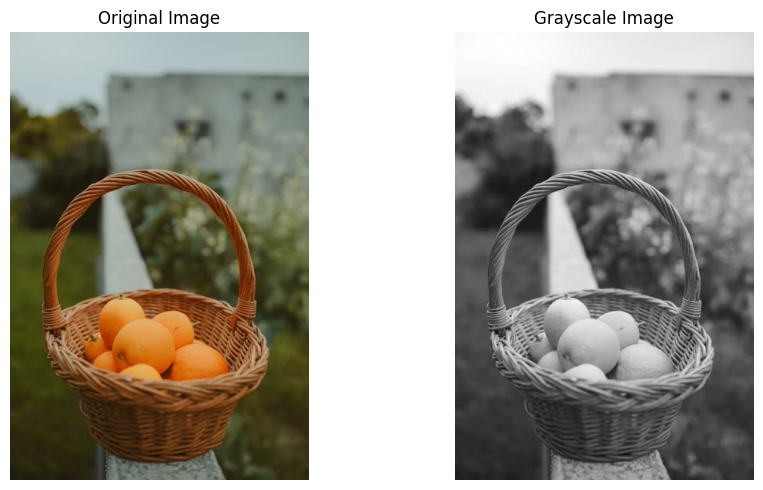

In [6]:
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread(image_path)

# Convert BGR to RGB for displaying with matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display original image
axes[0].imshow(img_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display grayscale image
axes[1].imshow(gray_img, cmap='gray')
axes[1].set_title('Grayscale Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()

## Extract RGB Channels

### Subtask:
Separate the original color image into its Red, Green, and Blue channels and display each channel.


**Reasoning**:
The subtask requires separating the RGB image into its individual color channels and displaying each using matplotlib. The provided instructions detail how to perform this operation by indexing the `img_rgb` array and then plotting them in subplots with grayscale colormaps and appropriate titles.



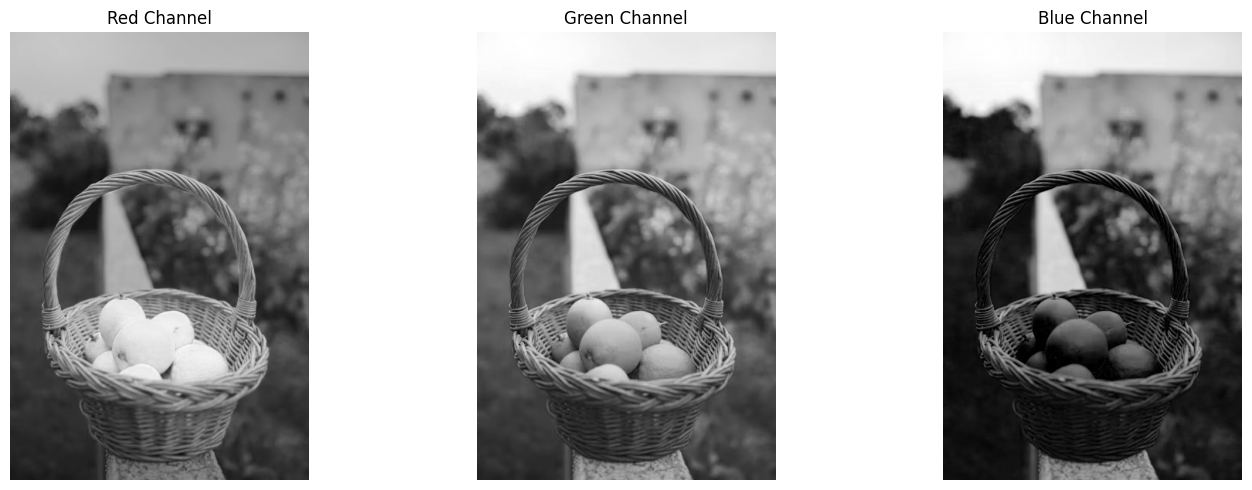

In [7]:
r = img_rgb[:, :, 0]
g = img_rgb[:, :, 1]
b = img_rgb[:, :, 2]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(r, cmap='gray')
axes[0].set_title('Red Channel')
axes[0].axis('off')

axes[1].imshow(g, cmap='gray')
axes[1].set_title('Green Channel')
axes[1].axis('off')

axes[2].imshow(b, cmap='gray')
axes[2].set_title('Blue Channel')
axes[2].axis('off')

plt.tight_layout()
plt.show()

## Convert to Other Color Spaces

### Subtask:
Convert the original RGB image into HSV, YCbCr, and Lab color spaces, and display a representation of each.


**Reasoning**:
The subtask requires converting the `img_rgb` image into HSV, YCbCr, and Lab color spaces, and then displaying each of them in subplots. This code block will perform the necessary color space conversions using OpenCV and visualize them using Matplotlib.



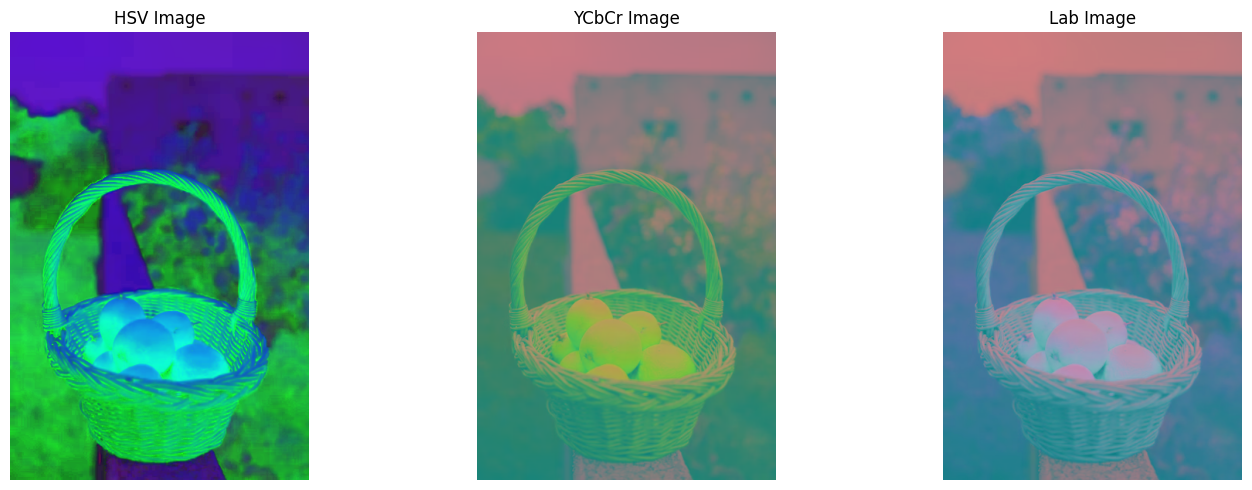

In [8]:
hsv_img = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
ycbcr_img = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YCrCb)
lab_img = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2Lab)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(hsv_img)
axes[0].set_title('HSV Image')
axes[0].axis('off')

axes[1].imshow(ycbcr_img)
axes[1].set_title('YCbCr Image')
axes[1].axis('off')

axes[2].imshow(lab_img)
axes[2].set_title('Lab Image')
axes[2].axis('off')

plt.tight_layout()
plt.show()

## Apply White Balance Correction

### Subtask:
Implement and apply a white balance correction technique to the original image and display the corrected image.


The subtask requires applying a white balance correction to the `img_rgb` image. This will be achieved using the 'gray world' assumption, which posits that, on average, the reflection of light from a scene should be achromatic. By calculating the average intensity of each color channel (Red, Green, Blue) and normalizing them against a global average (the 'gray world' average), we can derive scaling factors. These factors are then applied to each pixel in the respective channels, effectively correcting color casts and producing a more neutral image. The original and the corrected images will then be displayed side-by-side for comparison.

**Reasoning**:
The subtask requires implementing white balance correction. This code block calculates the average of each color channel, determines a 'gray world' average, computes scaling factors, applies these factors to correct the image, clips the pixel values, and then displays both the original and the white-balanced images side-by-side for comparison.



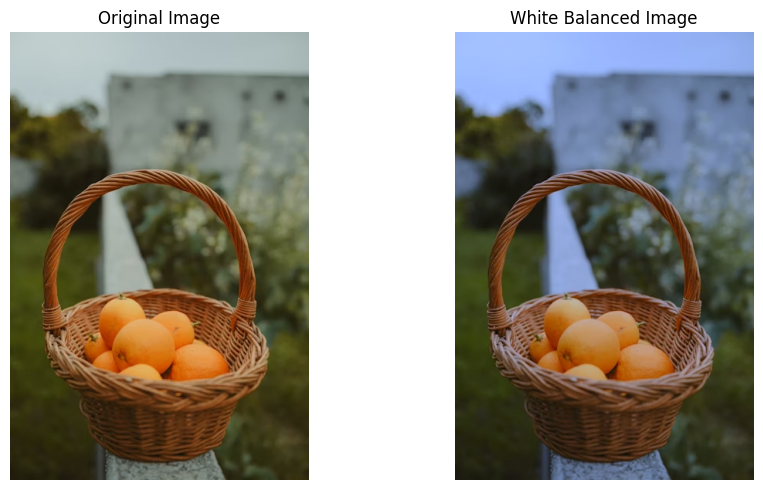

In [9]:
import numpy as np

# Calculate average of each channel
avg_r = np.mean(img_rgb[:, :, 0])
avg_g = np.mean(img_rgb[:, :, 1])
avg_b = np.mean(img_rgb[:, :, 2])

# Determine 'gray world' average
gray_world_avg = (avg_r + avg_g + avg_b) / 3

# Calculate scaling factors
scale_r = gray_world_avg / avg_r
scale_g = gray_world_avg / avg_g
scale_b = gray_world_avg / avg_b

# Apply scaling factors and clip values
balanced_r = np.clip(img_rgb[:, :, 0] * scale_r, 0, 255)
balanced_g = np.clip(img_rgb[:, :, 1] * scale_g, 0, 255)
balanced_b = np.clip(img_rgb[:, :, 2] * scale_b, 0, 255)

# Stack channels to form the balanced image
balanced_img = np.stack([balanced_r, balanced_g, balanced_b], axis=-1).astype(np.uint8)

# Display original and white-balanced images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(balanced_img)
axes[1].set_title('White Balanced Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()

## Perform Color Masking

### Subtask:
Apply color masking to isolate a specific color (e.g., green) from the original image using a suitable color space (e.g., HSV) and display the masked image.

## Perform Color Masking

### Subtask:
Apply color masking to isolate a specific color (e.g., green) from the original image using a suitable color space (e.g., HSV) and display the masked image.

The subtask requires isolating a specific color (e.g., green) using color masking. The HSV (Hue, Saturation, Value) color space is ideal for this purpose because it separates color information (hue) from intensity (value) and purity (saturation). This makes it much easier to define a range for a specific color than in RGB. We will define a lower and upper bound for the green color in HSV, create a mask based on these bounds, and then apply this mask to the original image to display only the green regions.

The subtask requires isolating a specific color (e.g., green) using color masking. The HSV (Hue, Saturation, Value) color space is ideal for this purpose because it separates color information (hue) from intensity (value) and purity (saturation). This makes it much easier to define a range for a specific color than in RGB. We will define a lower and upper bound for the green color in HSV, create a mask based on these bounds, and then apply this mask to the original image to display only the green regions.

**Reasoning**:
Now that the reasoning for color masking is established, the next step is to implement the color masking using the HSV color space to isolate the specified color (green).



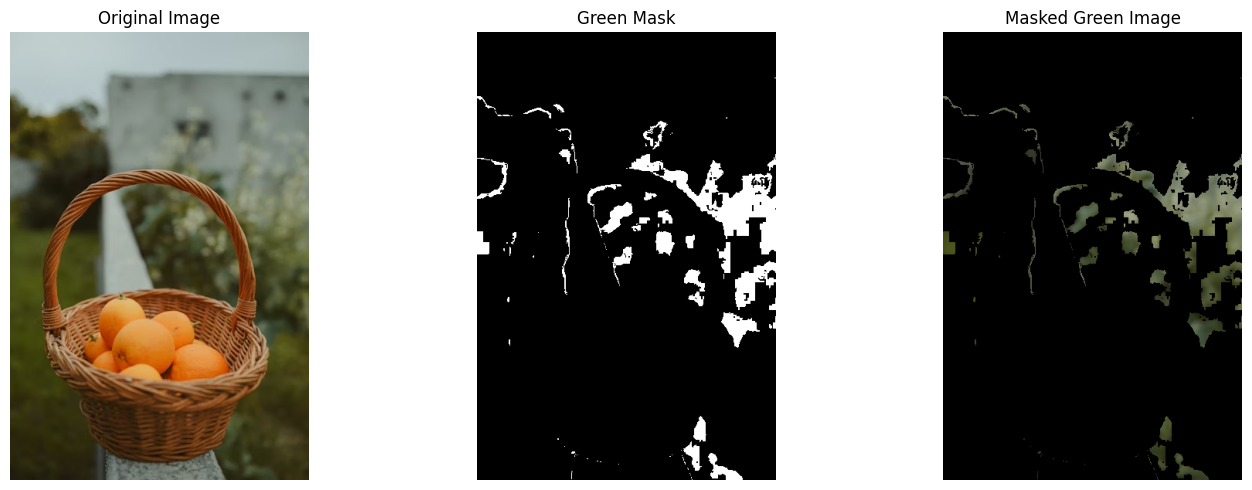

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the lower and upper bounds for green color in HSV
# These values might need adjustment depending on the specific shade of green in the image
lower_green = np.array([35, 40, 40])  # Example: Hue, Saturation, Value
upper_green = np.array([85, 255, 255])

# Convert RGB image to HSV
hsv_img = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

# Create a mask for green color
green_mask = cv2.inRange(hsv_img, lower_green, upper_green)

# Apply the mask to the original RGB image
masked_green_img = cv2.bitwise_and(img_rgb, img_rgb, mask=green_mask)

# Display the original image, the mask, and the masked green image
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(green_mask, cmap='gray')
axes[1].set_title('Green Mask')
axes[1].axis('off')

axes[2].imshow(masked_green_img)
axes[2].set_title('Masked Green Image')
axes[2].axis('off')

plt.tight_layout()
plt.show()

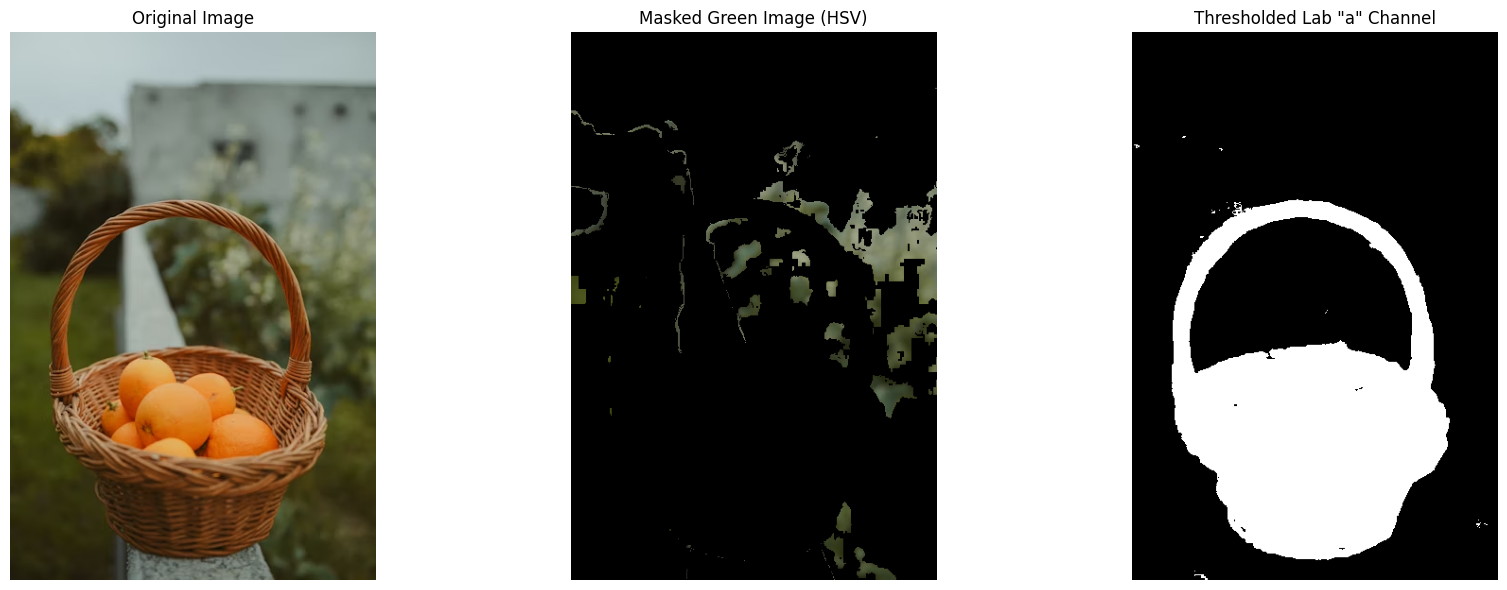

In [12]:
# Extract the 'a' channel from the Lab image
# The 'a' channel represents the green-red component
a_channel = lab_img[:, :, 1]

# Apply a simple binary threshold to the 'a' channel
# The threshold value might need adjustment based on the image content
# For the 'a' channel (green-red), values below 128 tend towards green, above towards red.
# Let's try to isolate a certain range, for example, more reddish parts or greenish parts.
# For demonstration, we'll try to highlight areas that are more 'reddish' (higher 'a' values).
# Or we can do simple binary threshold to separate high contrast features.

# Let's try thresholding to highlight certain features based on 'a' channel values
# We'll use a threshold of 128 to separate areas (assuming 0-255 range for 'a' channel)
_, a_thresh = cv2.threshold(a_channel, 128, 255, cv2.THRESH_BINARY)

# Create an image from the thresholded 'a' channel for visualization
segmented_a_channel_img = cv2.cvtColor(cv2.merge([np.zeros_like(a_channel), a_thresh, np.zeros_like(a_channel)]), cv2.COLOR_Lab2RGB)


# Display the original image, the masked green image, and the segmented Lab 'a' channel image
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(img_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(masked_green_img)
axes[1].set_title('Masked Green Image (HSV)')
axes[1].axis('off')

axes[2].imshow(a_thresh, cmap='gray')
axes[2].set_title('Thresholded Lab "a" Channel')
axes[2].axis('off')

plt.tight_layout()
plt.show()

## Compare Segmentation Strength

### Subtask:
Apply a simple segmentation technique (thresholding) to a different color space (Lab 'a' channel) to isolate features, and display the result alongside the original and the previously masked green image for visual comparison.


## Summary:

### Data Analysis Key Findings

*   The image was successfully loaded and converted to grayscale, with both versions displayed for visual comparison.
*   Individual Red, Green, and Blue channels were successfully extracted from the RGB image and displayed, illustrating the distribution of each primary color.
*   The image was successfully converted and displayed in three alternative color spaces: HSV, YCbCr, and Lab, demonstrating different representations of color information.
*   A white balance correction was applied using the 'gray world' assumption. This involved calculating the average intensity of the Red, Green, and Blue channels, computing a global 'gray world' average, and applying scaling factors to correct color casts, resulting in a visibly adjusted image.
*   Color masking was effectively performed to isolate green regions in the image. This was achieved by converting the RGB image to HSV, defining a green color range (lower bound: \[35, 40, 40], upper bound: \[85, 255, 255]), and applying a mask to display only the green pixels.

### Insights or Next Steps

*   Different color spaces (e.g., HSV for hue-based segmentation, Lab for perceptual uniformity) are crucial for specific image processing tasks, offering advantages over RGB depending on the desired analysis.
*   The effectiveness of segmentation and color correction techniques can vary significantly based on the chosen color space and the parameters used (e.g., HSV bounds for masking, or the white balance algorithm). Further refinement of these parameters can lead to more precise results.
